In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Users\VICTUS\Downloads\Student_Performance.csv")


In [5]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
data.shape

(10000, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [8]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(127)

In [14]:
data.drop_duplicates(inplace=True)

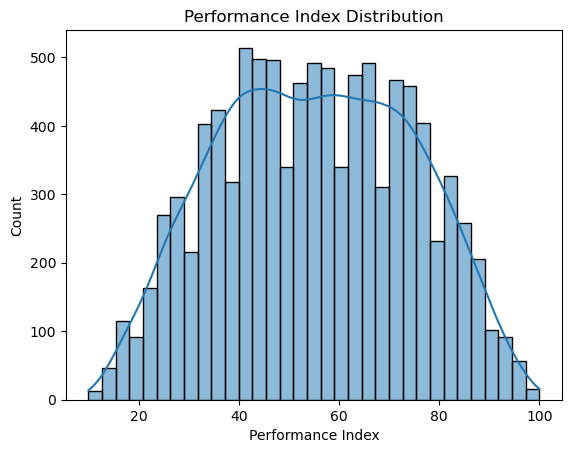

In [16]:
sns.histplot(data['Performance Index'], kde=True)
plt.title("Performance Index Distribution")
plt.show()


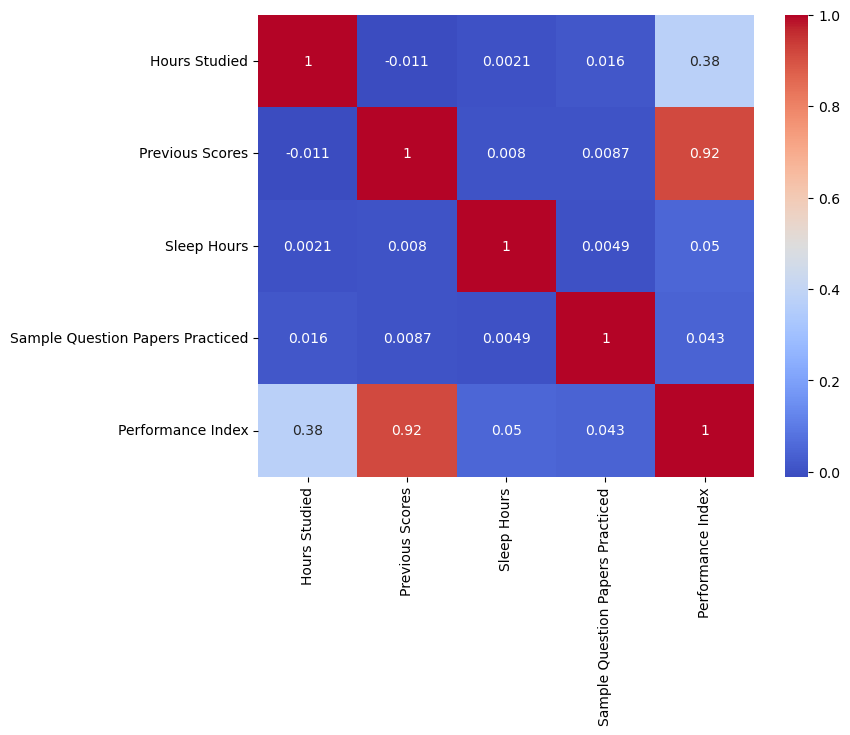

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


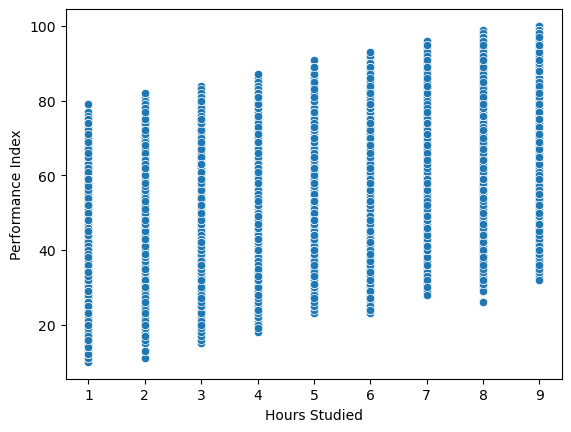

In [20]:
sns.scatterplot(x='Hours Studied', y='Performance Index', data=data)
plt.show()

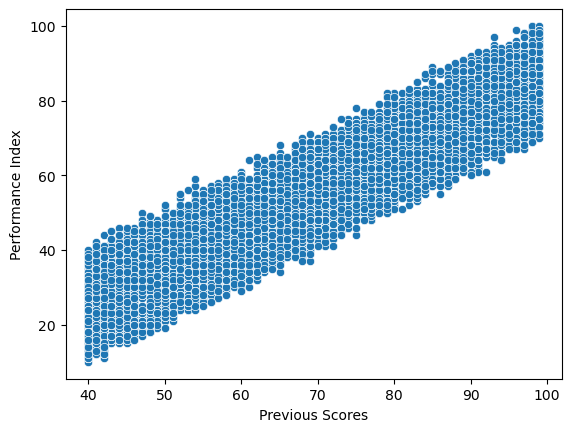

In [22]:
sns.scatterplot(x='Previous Scores', y='Performance Index', data=data)df.skew(numeric_only=True)


In [28]:
data.skew(numeric_only=True)


Hours Studied                      -0.003348
Previous Scores                     0.005581
Extracurricular Activities          0.020059
Sleep Hours                        -0.041350
Sample Question Papers Practiced   -0.034893
Performance Index                  -0.000412
dtype: float64

In [26]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes':1, 'No':0})


In [27]:
data.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [42]:
x = data.drop("Performance Index", axis=1)
y = data["Performance Index"]


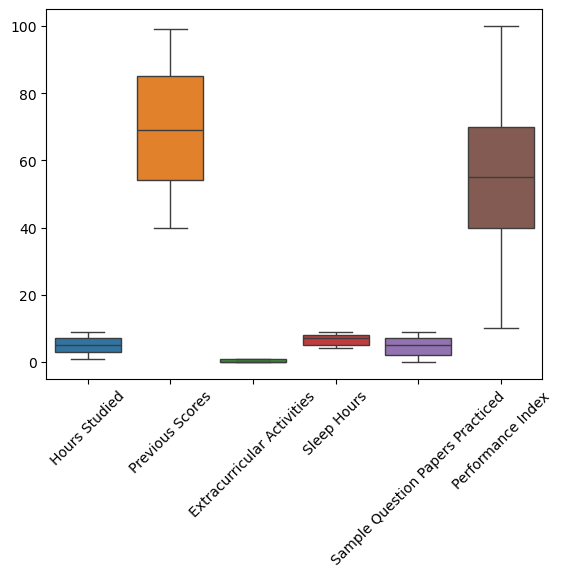

In [48]:
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()


In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)


In [44]:
x_train.shape , x_test.shape

((7898, 5), (1975, 5))

In [45]:
y_train.shape , y_test.shape

((7898,), (1975,))

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred = lr.predict(X_test)


In [51]:
lr.intercept_ , lr.coef_

(np.float64(-33.98132449644069),
 array([2.8510219 , 1.01843034, 0.57382297, 0.47207329, 0.18870366]))

In [54]:
predicted_val = lr.predict(x_test)

C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
predicted_val

array([-35.21196177, -30.91584318, -32.46330104, ..., -34.78674905,
       -29.79505349, -36.01067432], shape=(1975,))

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [62]:
mse = mean_squared_error(y_test, y_pred)

In [63]:
rmse = np.sqrt(mse)


In [64]:
r2 = r2_score(y_test, y_pred)

In [65]:
print("Model Evaluation Results")
print("------------------------")
print(f"MSE   : {mse:.4f}")
print(f"RMSE  : {rmse:.4f}")
print(f"R2    : {r2:.4f}")

Model Evaluation Results
------------------------
MSE   : 4.3059
RMSE  : 2.0751
R2    : 0.9884


In [67]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
polynomial = PolynomialFeatures(degree=2)
poly_features = polynomial .fit_transform(x_train)
lr = LinearRegression()
lr.fit(poly_features , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
lr.coef_ , lr.intercept_

(array([ 0.00000000e+00,  7.37293580e+00,  1.76208604e+01,  2.87910557e-01,
         8.03809163e-01,  5.40408423e-01,  2.20850688e-02,  3.37821451e-04,
         1.80858135e-02,  4.30005376e-02,  1.83464953e-02, -2.24326878e-02,
         2.04744085e-02,  9.87844951e-03, -2.02202485e-02,  3.49961052e-03,
        -9.32553272e-03, -2.27921783e-02,  2.50821538e-02,  2.40089775e-02,
         1.85752480e-03]),
 np.float64(55.06527236001581))

In [70]:
test_feature = polynomial.fit_transform(x_test)

In [ ]:
pred = model.predict(x_test)

In [ ]:
from sklearn.svm import SVC , SVR
